# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

#custom parameters for the graphs
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                'axes.facecolor':'whitesmoke'}
sns.set_theme(rc=custom_params)

## Task 1

### a)

#### bp 1,2)

#### First two points

In [2]:
def draw_from_dist(corr, n):
    XY = np.random.multivariate_normal(mean=(0,0), cov=[[1,corr],[corr,1]], size=n)
    return XY[:,0], XY[:,1]


# pearsonr - Pearson correlation
#TO DO
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to; 
#                           for sure sklearn.metrics.mutual_info_score doesn't do what we want)

def compute_mutual_info(x, y, bins=10):
    discretized_x = pd.qcut(x, q=bins)
    discretized_y = pd.qcut(y, q=bins)
    return mutual_info_score(discretized_x, discretized_y)

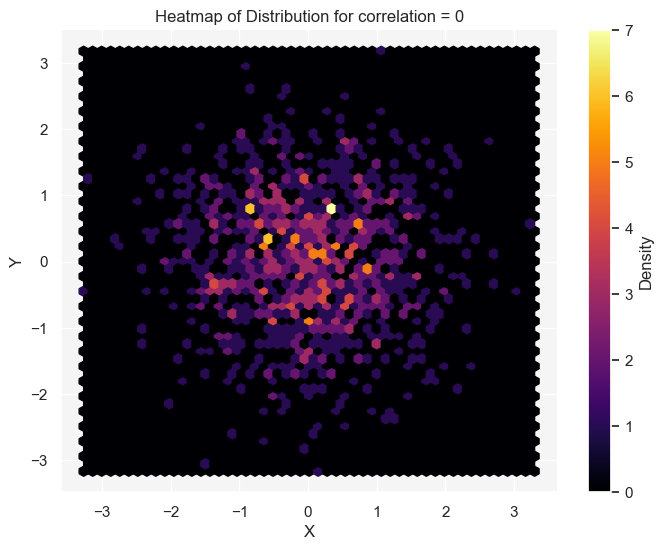

Pearson correlation for correlation = 0: -0.04746140386463606
Mutual information for correlation = 0: 0.040971859736427425



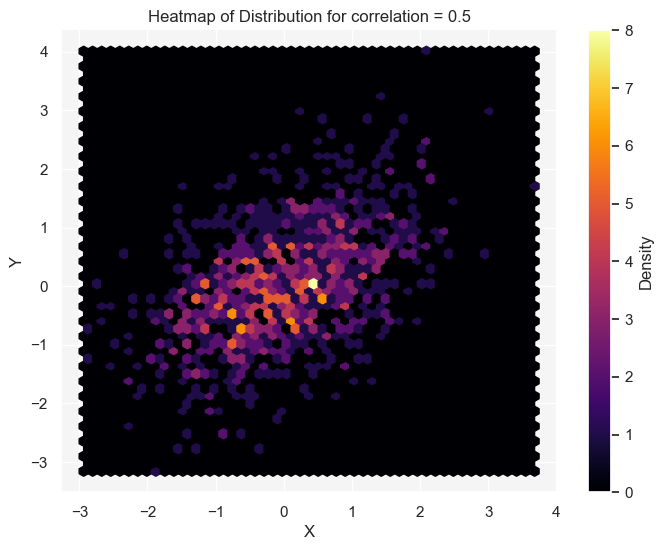

Pearson correlation for correlation = 0.5: 0.4807486825924089
Mutual information for correlation = 0.5: 0.144033037584395



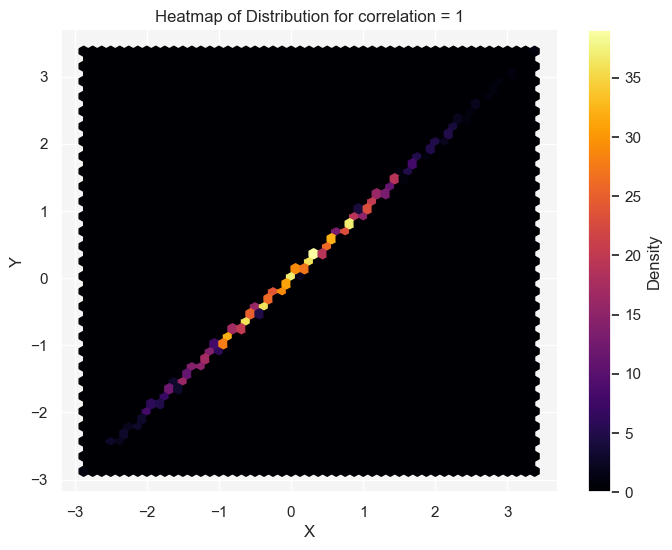

Pearson correlation for correlation = 1: 1.0
Mutual information for correlation = 1: 2.302585092994045



In [5]:
correlations = [0, 0.5, 1]
for corr in correlations:
    X, Y = draw_from_dist(corr, n=1000)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    plt.hexbin(X, Y, gridsize=50, cmap='inferno')
    plt.colorbar(label='Density')
    plt.title(f'Heatmap of Distribution for correlation = {corr}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    # Compute Pearson correlation
    pearson_corr, _ = pearsonr(X,Y)
    print(f"Pearson correlation for correlation = {corr}: {pearson_corr}")

    # Compute mutual information
    mutual_info = compute_mutual_info(X,Y)
    print(f"Mutual information for correlation = {corr}: {mutual_info}\n")

#### bp 3)

In [8]:
theroretical_corrs = np.arange(0,1.1,0.1)
corr_experiments = {curr_corr:[] for curr_corr in theroretical_corrs}
mutual_info_experiments = {curr_corr:[] for curr_corr in theroretical_corrs}

for corr in corr_experiments:
    for iter in range(100):
        X, Y = draw_from_dist(corr, n=1000)
        pearson_corr, _ = pearsonr(X,Y)
        mutual_info = compute_mutual_info(X,Y)
        
        corr_experiments[corr].append(pearson_corr)
        mutual_info_experiments[corr].append(mutual_info)


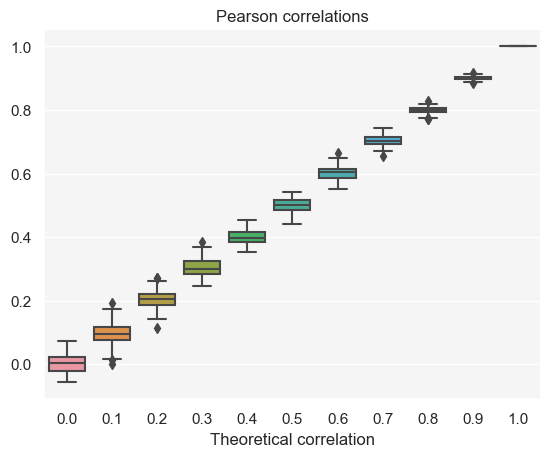

In [13]:
sns.boxplot([corr_experiments[curr_corr] for curr_corr in corr_experiments])
plt.xticks(np.arange(0, theroretical_corrs.shape[0]),
           [str(round(corr,1)) for corr in corr_experiments.keys()])
plt.title('Pearson correlations')
plt.xlabel('Theoretical correlation')
plt.show()

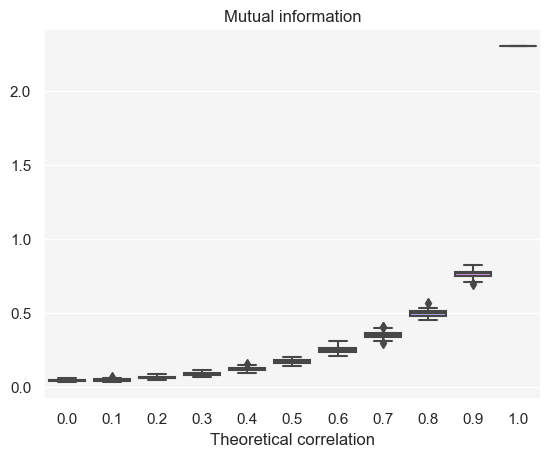

In [15]:
sns.boxplot([mutual_info_experiments[curr_corr] for curr_corr in mutual_info_experiments])
plt.xticks(np.arange(0, theroretical_corrs.shape[0]),
           [str(round(corr,1)) for corr in mutual_info_experiments.keys()])
plt.title('Mutual information')
plt.xlabel('Theoretical correlation')
plt.show()

### b)

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [17]:
def calculate_mutual_info_from_formula(corr_thoretical):
    corr_pearsons = []
    info_from_theretical = []
    info_from_pearson = []

    for corr in corr_thoretical:
        X, Y = draw_from_dist(corr, n=1000)
        pearson_corr, _ = pearsonr(X,Y)
        corr_pearsons.append(pearson_corr)

    info_from_theretical = -1/2*np.log(1-np.array(corr_thoretical)**2)
    info_from_pearson = -1/2*np.log(1-np.array(corr_pearsons)**2)

    fig, axs = plt.subplots(1,2,figsize=(18,6))
    axs[0].plot(corr_pearsons, info_from_pearson)
    axs[0].set_title('Theoretical correlation')
    axs[1].plot(corr_thoretical, info_from_theretical)
    axs[1].set_title('Pearson correlation')

    plt.show()

    return info_from_theretical, info_from_pearson
    


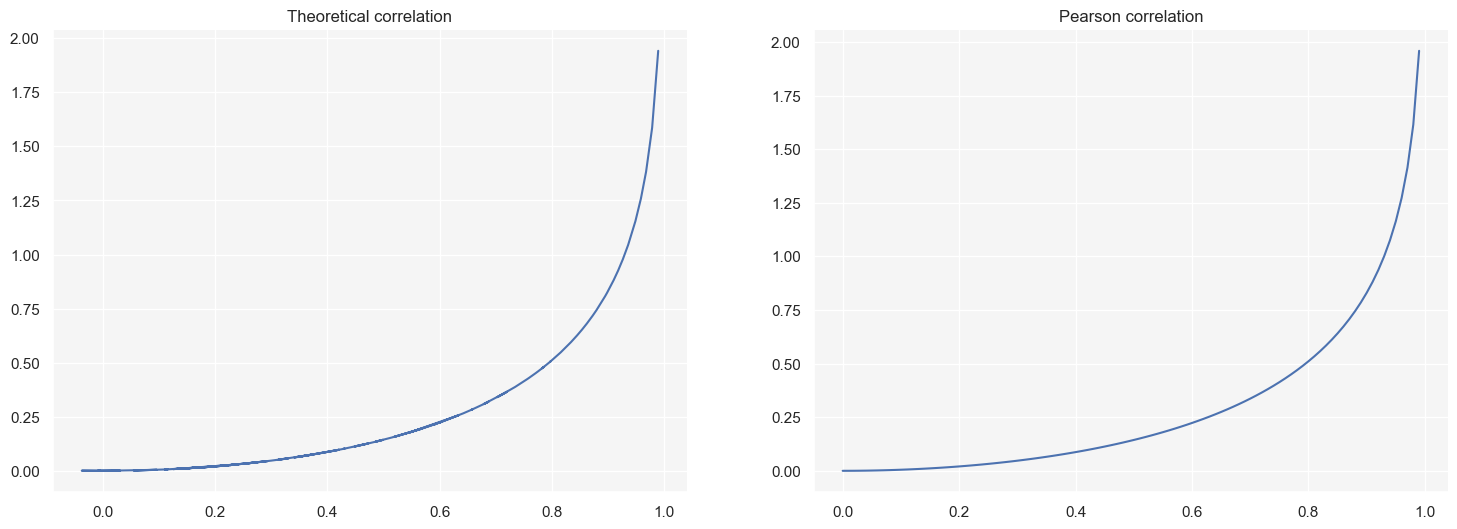

In [19]:
info_from_theretical, info_from_pearson = calculate_mutual_info_from_formula(np.arange(0,1,0.01))

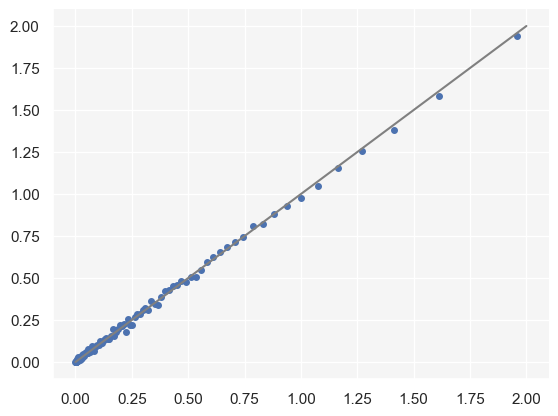

In [27]:
plt.plot(info_from_theretical, info_from_pearson, "o", color='C0', markersize=4)
plt.plot([0,2], [0, 2], color="gray")
plt.show()

### Iteration N=100

In [53]:
def calculate_mutual_info_from_formula_2(theroretical_corrs = np.arange(0,1,0.1)):
    
    info_from_theretical = {curr_corr:[] for curr_corr in theroretical_corrs}
    info_from_pearson = {curr_corr:[] for curr_corr in theroretical_corrs}
    corr_experiments = {curr_corr:[] for curr_corr in theroretical_corrs}
    mutual_info_experiments = {curr_corr:[] for curr_corr in theroretical_corrs}

    for corr in theroretical_corrs:
        for iter in range(100):
            X, Y = draw_from_dist(corr, n=1000)
            pearson_corr, _ = pearsonr(X,Y)
            corr_experiments[corr].append(pearson_corr)

            mutual_info = compute_mutual_info(X,Y)
            mutual_info_experiments[corr].append(mutual_info)

        pearson_corr = np.array(corr_experiments[corr])
        curr_corrs = np.array([corr]*100)
        info_from_theretical[corr] = np.array([0]*100) if corr==0 else \
                                                -1/2*np.log(1-curr_corrs**2)
        info_from_pearson[corr] = -1/2*np.log(1-pearson_corr**2)


    return corr_experiments, mutual_info_experiments, info_from_theretical, info_from_pearson
    

In [54]:
corr_experiments, mutual_info_experiments, info_from_theretical, info_from_pearson = calculate_mutual_info_from_formula_2(np.arange(0.01,1,0.01))

In [83]:
all_theor_vals = []
for curr in info_from_theretical:
    all_theor_vals += info_from_theretical[curr].tolist()

all_pears_vals = []
for curr in info_from_pearson:
    all_pears_vals += info_from_pearson[curr].tolist()

all_sklearn_vals = []
for curr in mutual_info_experiments:
    all_sklearn_vals += mutual_info_experiments[curr]

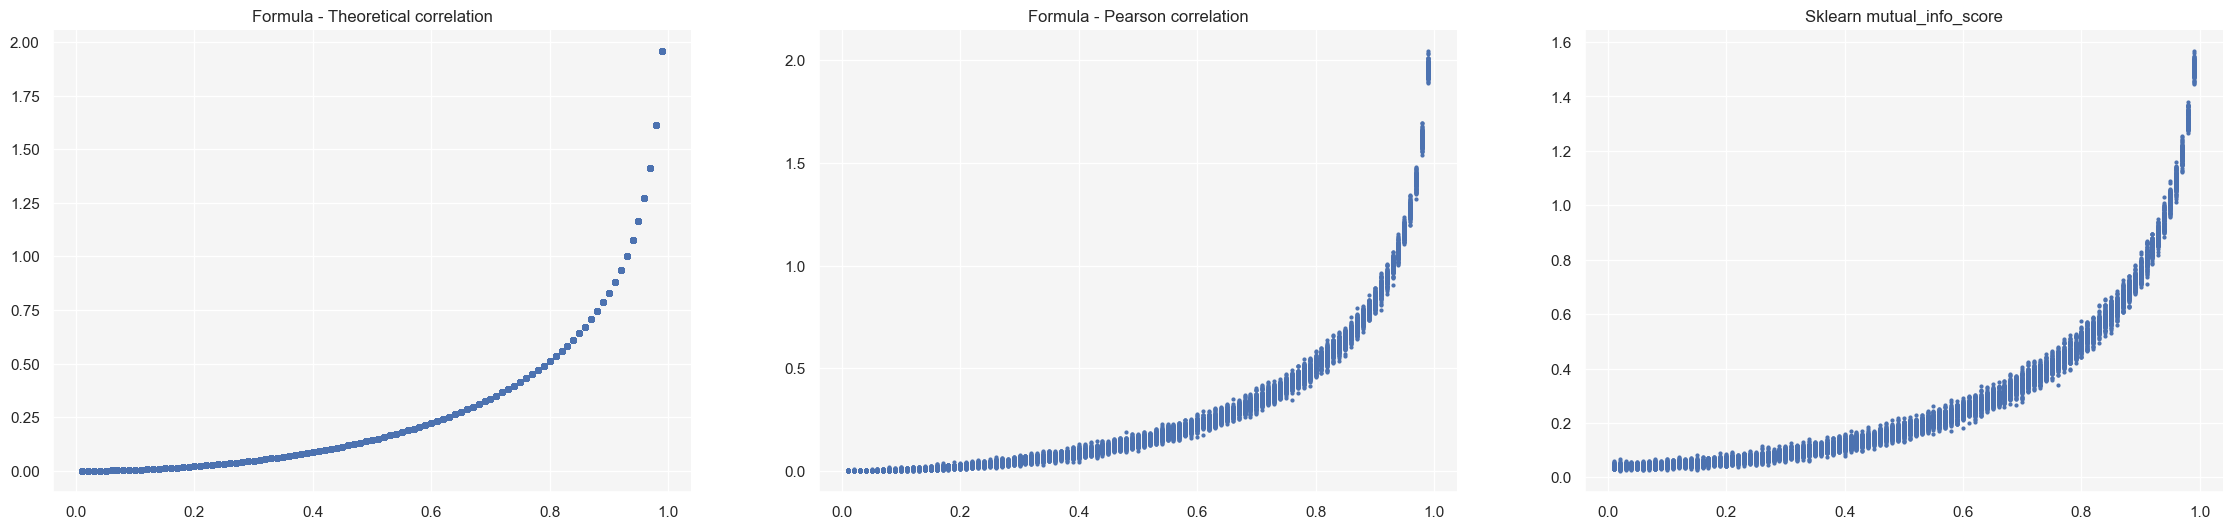

In [87]:
fig, axs = plt.subplots(1,3,figsize=(28,6))
axs[0].plot(np.repeat(np.arange(0.01,1,0.01), 100), all_theor_vals, "o", color='C0', markersize=4)
axs[0].set_title('Formula - Theoretical correlation')
axs[1].plot(np.repeat(np.arange(0.01,1,0.01), 100), all_pears_vals, "o", color='C0', markersize=2)
axs[1].set_title('Formula - Pearson correlation')
axs[2].plot(np.repeat(np.arange(0.01,1,0.01), 100), all_sklearn_vals, "o", color='C0', markersize=2)
axs[2].set_title('Sklearn mutual_info_score')

plt.show()


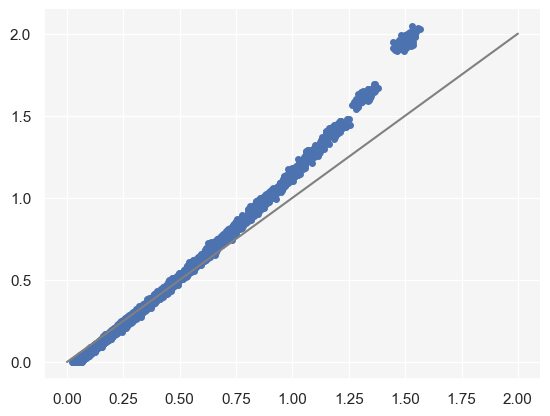

In [92]:
plt.plot(all_sklearn_vals, all_pears_vals, "o", color='C0', markersize=4)
plt.plot([0,2], [0, 2], color="gray")
plt.show()

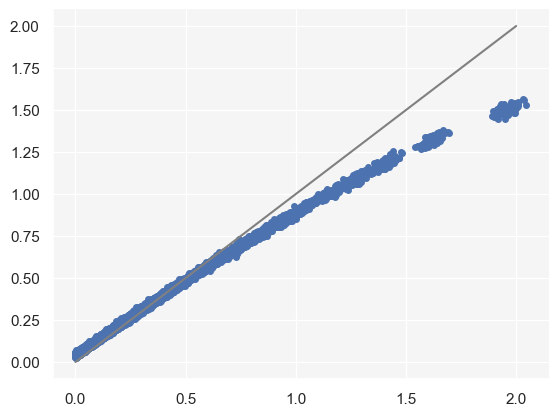

In [93]:
plt.plot(all_pears_vals, all_sklearn_vals, "o", color='C0', markersize=4)
plt.plot([0,2], [0, 2], color="gray")
plt.show()

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

In [95]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

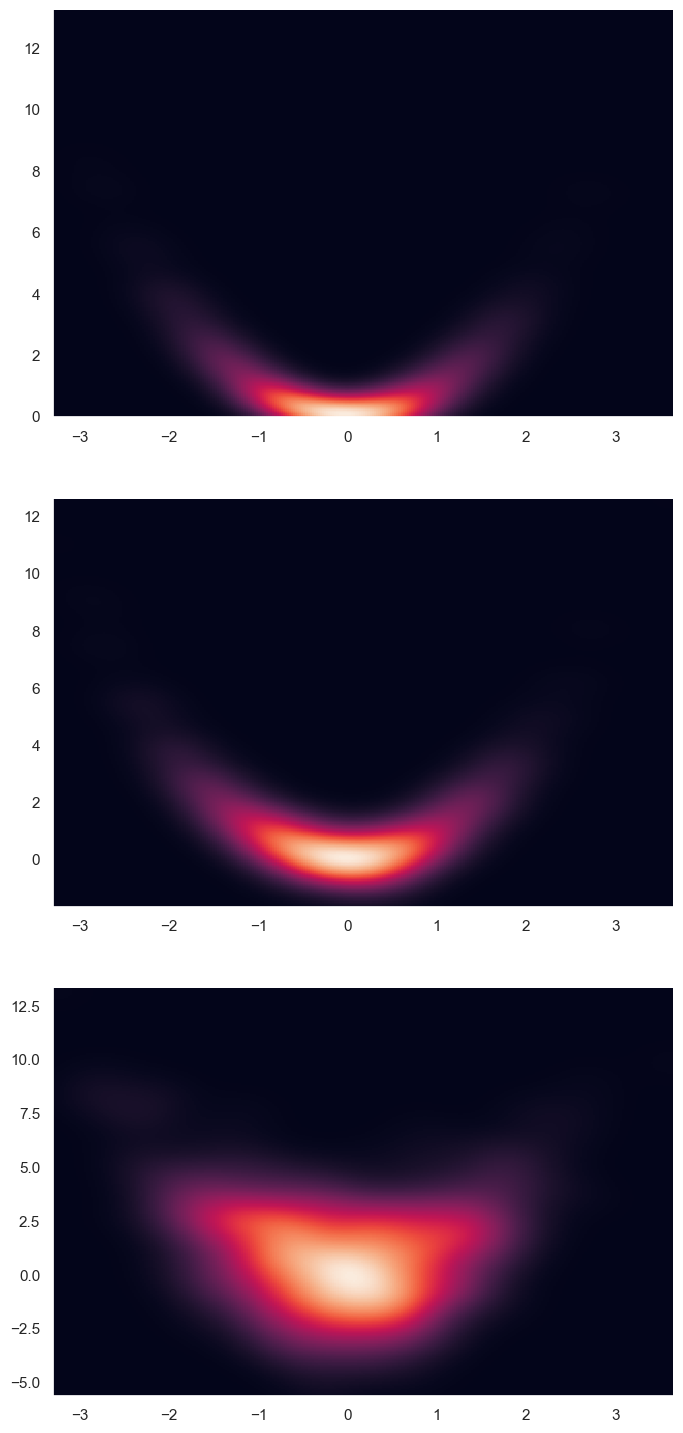

In [98]:
fig, axs = plt.subplots(3, figsize=(8,18))

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [102]:
eps_seq = np.exp(np.linspace(-1, 1, 20))
n = 1000

corr_experiments2 = {curr_eps:[] for curr_eps in eps_seq}
mutual_info_experiments2 = {curr_eps:[] for curr_eps in eps_seq}

for iter in range(100):
    x = np.random.normal(0, 1, n)

    for eps in corr_experiments2:
        y = x**2 + np.random.normal(0, eps, n)
        pearson_corr, _ = pearsonr(x,y)
        mutual_info = compute_mutual_info(x,y)
    
        corr_experiments2[eps].append(pearson_corr)
        mutual_info_experiments2[eps].append(mutual_info)


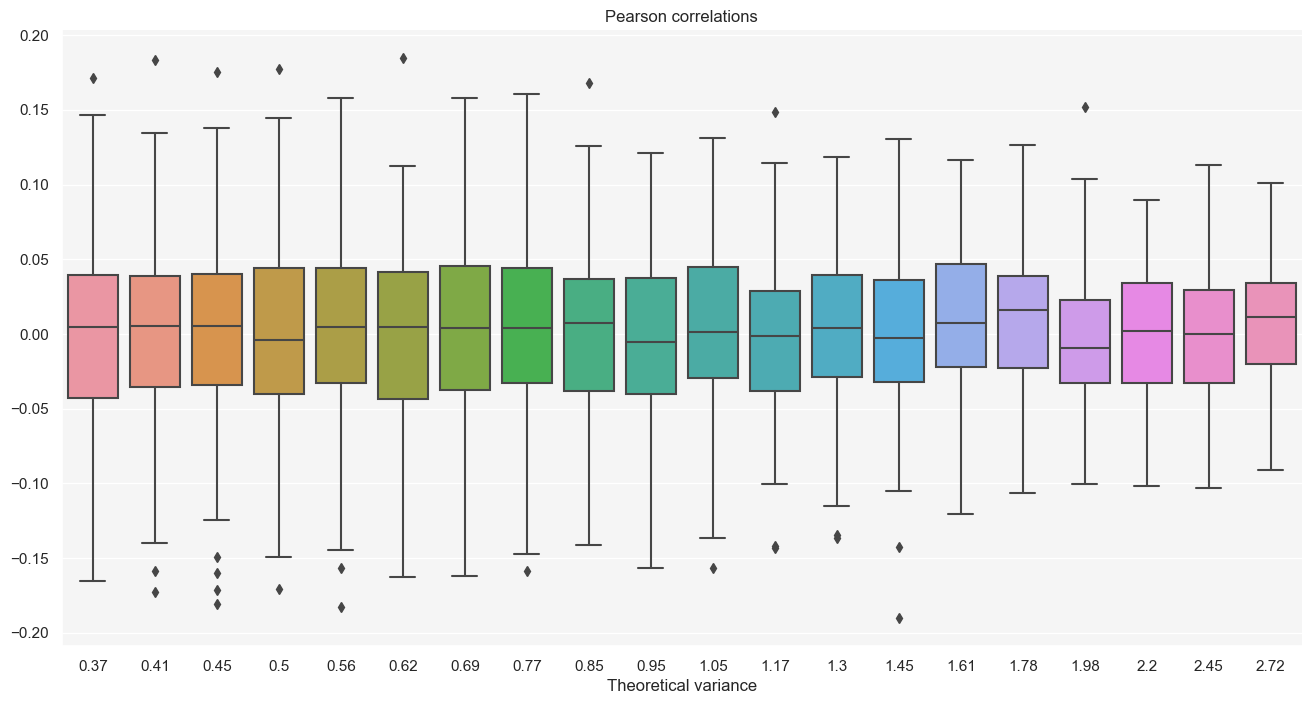

In [107]:
plt.figure(figsize=(16,8))
sns.boxplot([corr_experiments2[curr_corr] for curr_corr in corr_experiments2])
plt.xticks(np.arange(eps_seq.shape[0]), [str(round(corr,2)) for corr in corr_experiments2.keys()])
plt.title('Pearson correlations')
plt.xlabel('Theoretical variance')
plt.show()

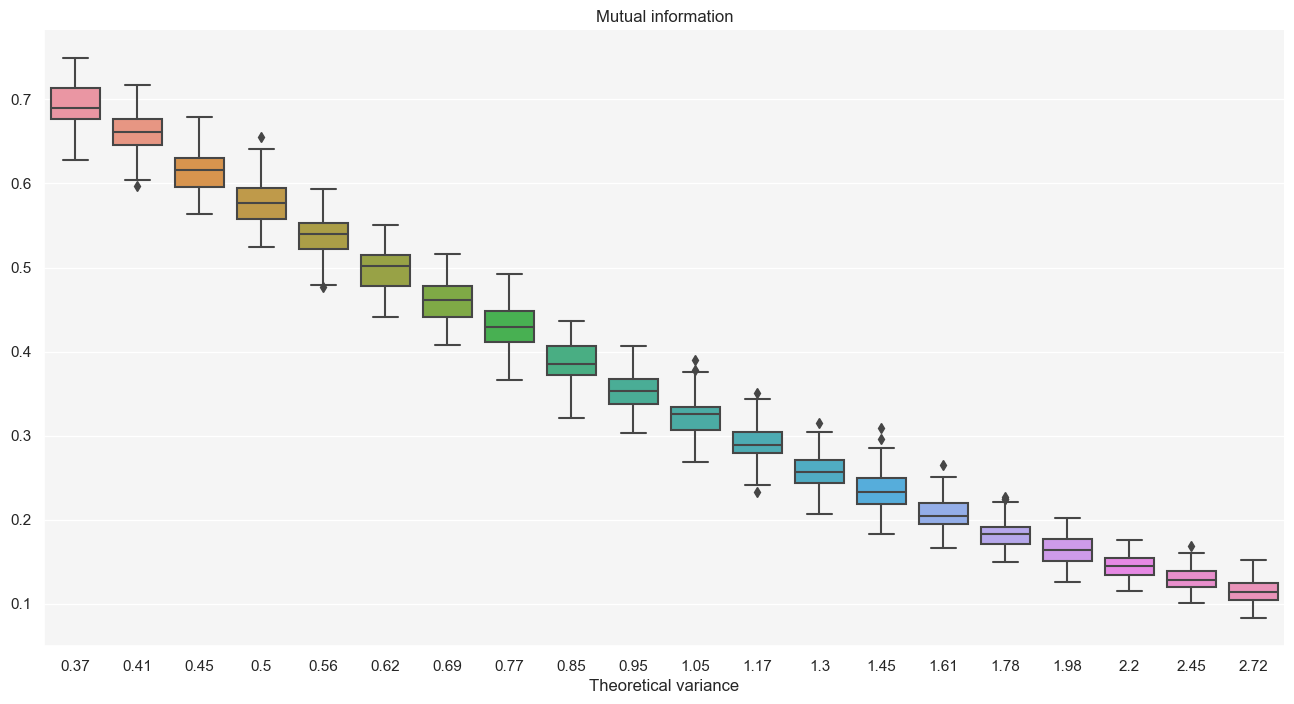

In [108]:
plt.figure(figsize=(16,8))
sns.boxplot([mutual_info_experiments2[curr_corr] for curr_corr in mutual_info_experiments2])
plt.xticks(np.arange(eps_seq.shape[0]), [str(round(corr,2)) for corr in corr_experiments2.keys()])
plt.title('Mutual information')
plt.xlabel('Theoretical variance')
plt.show()

## Task 2

### a)

In [9]:
def indep_test_asymptotic(X, Y, stat:{"mi","chi2"}):

    if stat == "mi":
        stat_value = 2 * X.shape[0] * mutual_info_score(X, Y)

    elif stat == "chi2":
        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res.statistic

    df = (np.unique(X).shape[0] - 1) * (np.unique(Y).shape[0] - 1)
    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [7]:
def indep_test_permutation(X, Y, B, stat="mi"):

    stat_value = mutual_info_score(X, Y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2 * X.shape[0] * stat_value, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [14]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
X = np.random.randint(0, 10, size=1000)
Y = np.random.randint(0, 10, size=1000)

In [15]:
stat_value_mi, p_value_mi = indep_test_asymptotic(X, Y, stat='mi')
stat_value_pearson, p_value_pearson = indep_test_asymptotic(X, Y, stat='chi2')
stat_value_perm, p_value_perm = indep_test_permutation(X, Y, B=100)

In [16]:
print(f'Asymptotic test based on 2n*I(X,Y) - statistic: {stat_value_mi}, p-value: {p_value_mi}') 
print(f'Pearson chi-squared test - statistic: {stat_value_pearson}, p-value: {p_value_pearson}') 
print(f'Permutation test - statistic: {stat_value_perm}, p-value: {p_value_perm}')

Asymptotic test based on 2n*I(X,Y) - statistic: 83.48397125524319, p-value: 0.40304393153778717
Pearson chi-squared test - statistic: 82.1266599049533, p-value: 0.44414811524204467
Permutation test - statistic: 83.48397125524319, p-value: 0.42574257425742573


As expected, high p-values of each test which confirms the independence of the random variables.

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [26]:
# independent r.v. - ideally we will reject the null hypothesis
X = np.random.randint(0, 10, size=1000)
Y = X**2 + np.random.randint(-5,5,size=1000)

In [27]:
stat_value_mi, p_value_mi = indep_test_asymptotic(X, Y, stat='mi')
stat_value_pearson, p_value_pearson = indep_test_asymptotic(X, Y, stat='chi2')
stat_value_perm, p_value_perm = indep_test_permutation(X, Y, B=100)

In [28]:
print(f'Asymptotic test based on 2n*I(X,Y) - statistic: {stat_value_mi}, p-value: {p_value_mi}') 
print(f'Pearson chi-squared test - statistic: {stat_value_pearson}, p-value: {p_value_pearson}') 
print(f'Permutation test - statistic: {stat_value_perm}, p-value: {p_value_perm}')

Asymptotic test based on 2n*I(X,Y) - statistic: 3856.890552177627, p-value: 0.0
Pearson chi-squared test - statistic: 6618.168744647485, p-value: 0.0
Permutation test - statistic: 3856.890552177627, p-value: 0.009900990099009901


As expected, low p-values (much less than 0.05) of each test, thus we reject the hypothesis of independence.